### 实验介绍

#### 数据说明
该数据集是来自美国疾病控制预防中心的数据，背景是记录美国的糖尿病症状信息，现在美国1/7的成年人患有糖尿病。但是到2050年，这个比例将会快速增长至高达1/3。我们可以利用从UCI机器学习数据库里一个关于印第安人糖尿病数据集，通过数据挖掘相关算法来预测糖尿病，该问题本质上是一个二元分类问题。


### 挖掘流程

In [136]:
# 警告处理 
import warnings
warnings.filterwarnings('ignore')
# 在Jupyter上画图
%matplotlib inline

In [137]:
#引入相关支持的包
import pandas as pd
import numpy as np
#可以事先将提供的数据集存储在本地，此处对该地址进行引用即可
#注意文件所存放路径不要有中文，容易报错
df= pd.read_csv(r'pima-indians-diabetes.data',sep=',')
#并观察熟悉数据
print(df.shape)
df.head()


(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFuction,Age,Outcome
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1


利用head函数，可以看到：糖尿病数据集由768个数据点组成，各有9个特征，特征分别是：怀孕次数，血糖，血压，皮脂厚度，胰岛素，BMI身体质量指数，糖尿病遗传函数，年龄和结果，此处是一个数据框格式，前8个特征均是数值型属性，最后1列是目标向量，是我们将要预测的特征，其中0意味着未患糖尿病，1意味着患有糖尿病。

## 改进部分：

### 数据进行多方面描述，更加熟悉数据

In [138]:
# 数据描述
print(df.describe())
# 通过describe可以观察到数据的数量，平均值，标准差，最小值，最大值等数据
 
#数据形状
print("dimension of diabetes data: {}".format(df.shape))
 
#查看标签分布 
print(df.Outcome.value_counts())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFuction         Age     Outcome  
count  768.000000               768.000000  768.000000  768.000000  
mean    31.992578                 0.472396   33.240885    0.348958  
std      7.884160                 0.331242   11.760232    0.476951  
min      0.000000                 0.080

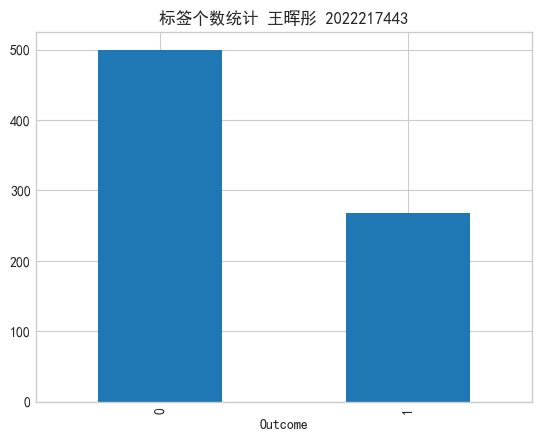

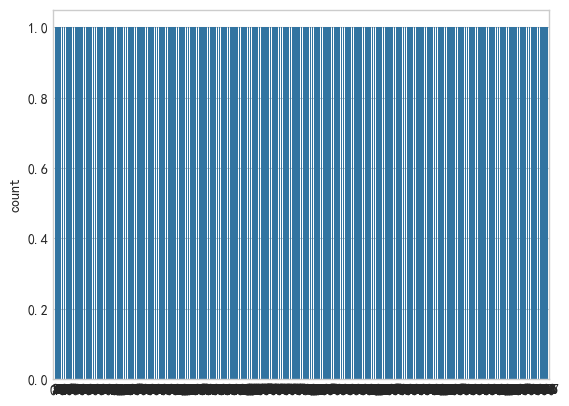

In [139]:
#使用柱状图的方式画出标签个数统计
plt.figure()
df.Outcome.value_counts().plot(kind="bar")

plt.title("标签个数统计 王晖彤 2022217443")
plt.figure()
sns.countplot(df['Outcome'], label="Count")
plt.savefig("0_1_graph")


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pregnancies              768 non-null    int64  
 1   Glucose                  768 non-null    int64  
 2   BloodPressure            768 non-null    int64  
 3   SkinThickness            768 non-null    int64  
 4   Insulin                  768 non-null    int64  
 5   BMI                      768 non-null    float64
 6   DiabetesPedigreeFuction  768 non-null    float64
 7   Age                      768 non-null    int64  
 8   Outcome                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [141]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

'\nsns.pairplot(df, hue="Outcome");\nplt.savefig("0_3_grap")\n'

<Figure size 640x480 with 0 Axes>

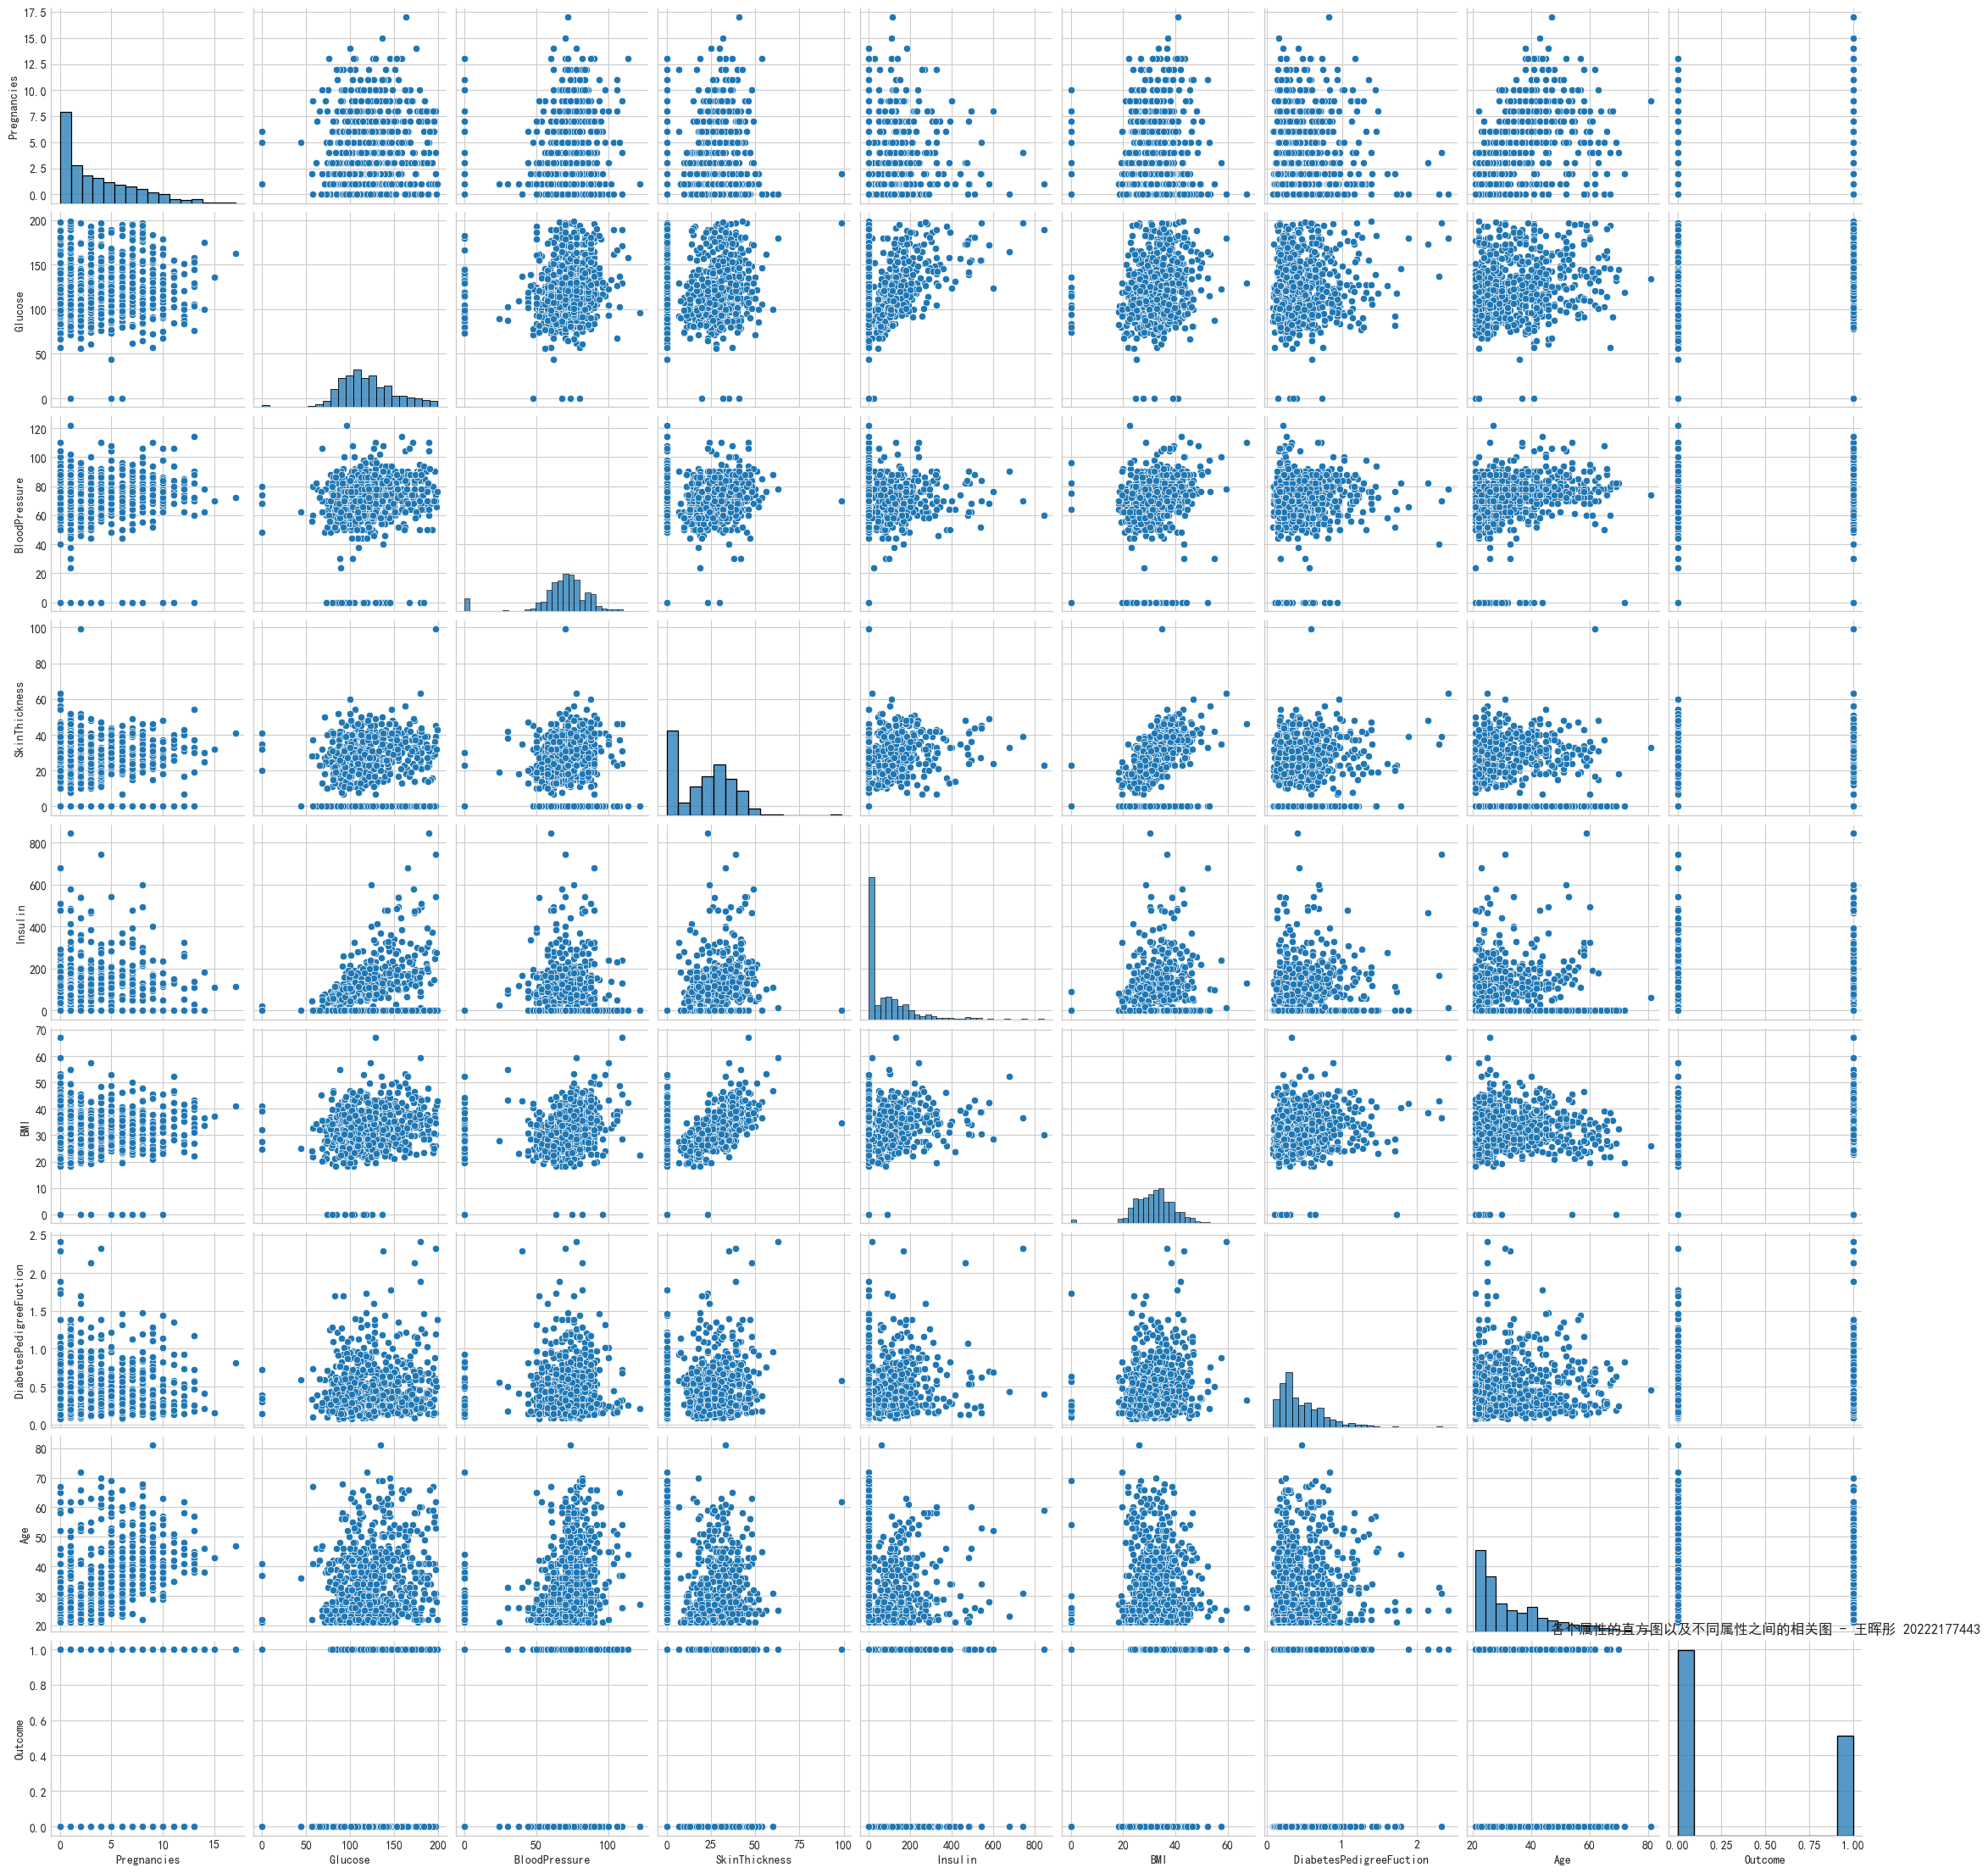

In [142]:
# 可视化数据分布
# 对角线上是各个属性的直方图（分布图）
# 而非对角线上是两个不同属性之间的相关图
plt.figure()
sns.pairplot(df)
plt.savefig("0_2_graph")
plt.title("各个属性的直方图以及不同属性之间的相关图 - 王晖彤 20222177443")
'''
sns.pairplot(df, hue="Outcome");
plt.savefig("0_3_grap")
'''

<Axes: >

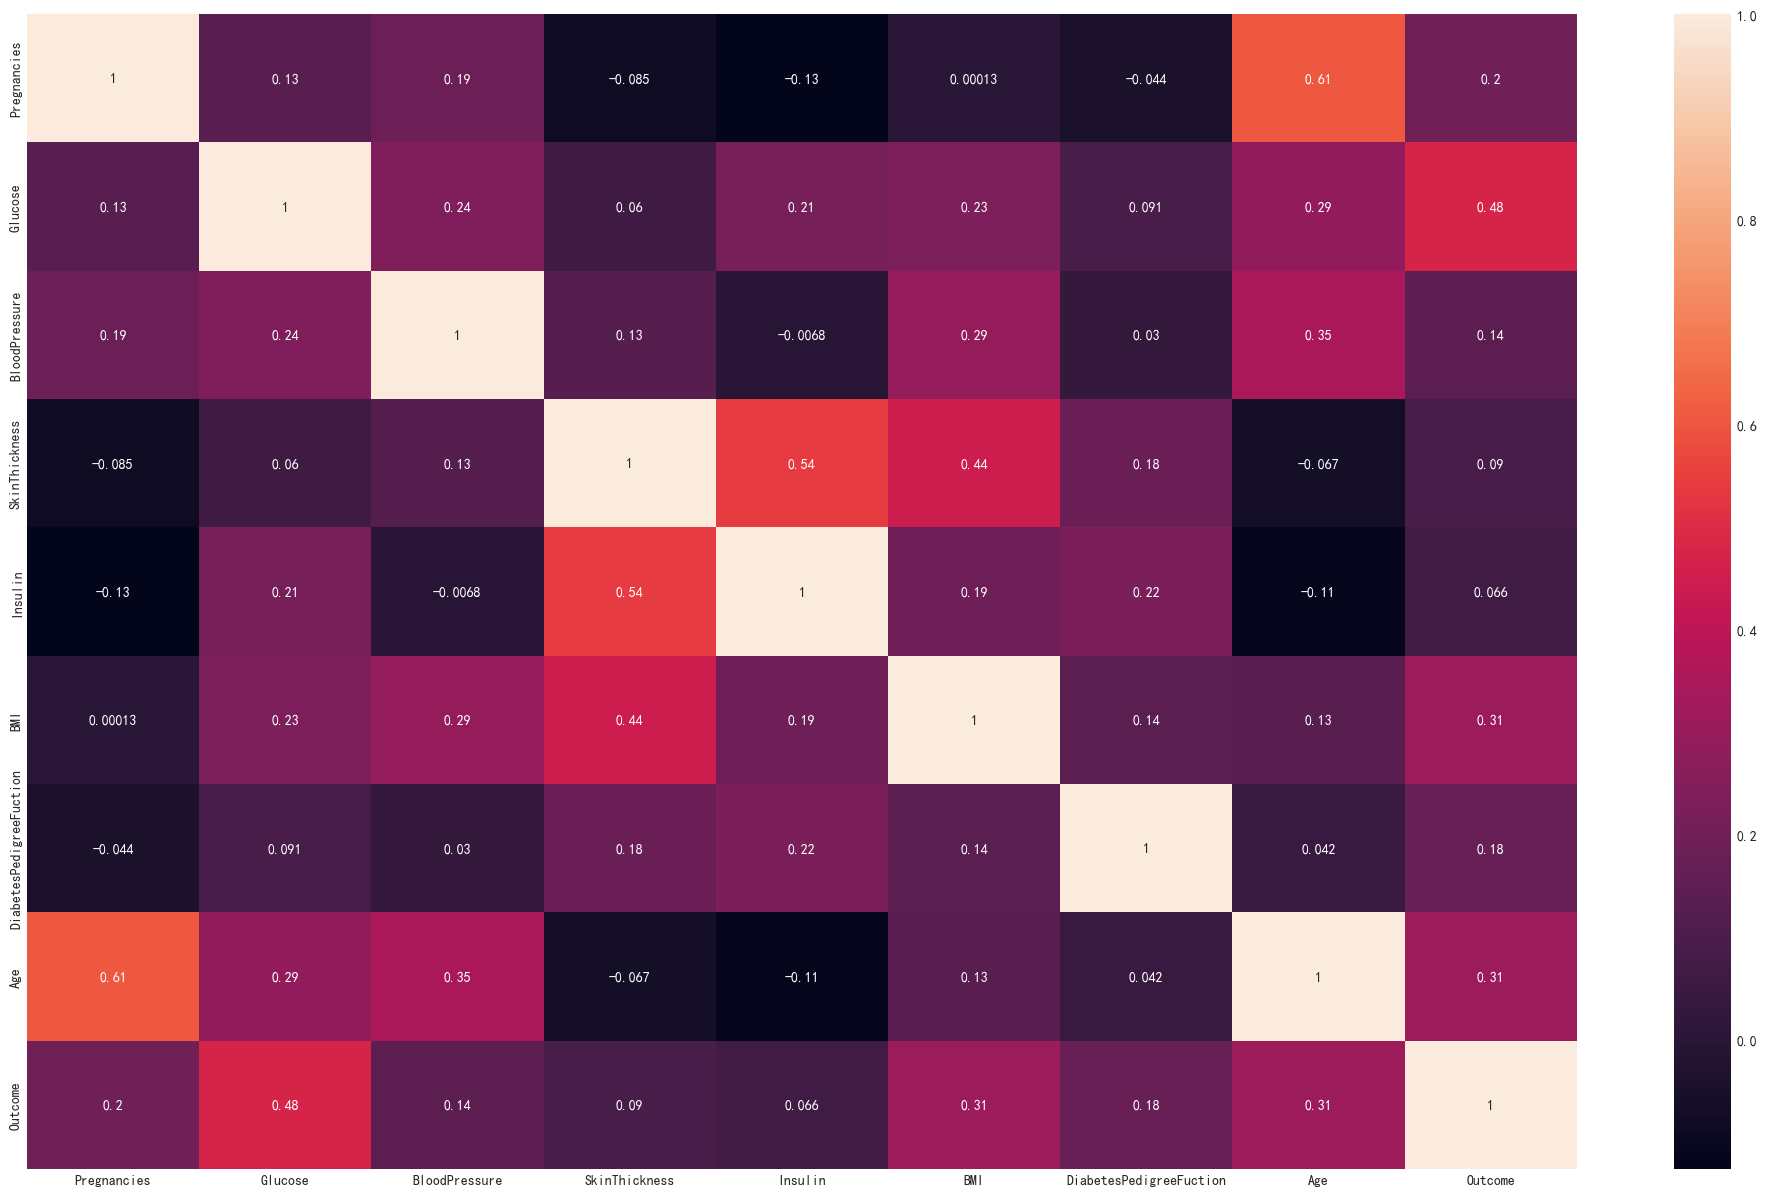

In [143]:
#导入相关包
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'SimHei'  # 使用宋体，可以根据需要更换为其他中文字体

#计算特征相关性并可视化
corr_matrix = df.corr(method='spearman') # pearson 皮尔逊, 是spearman 斯皮尔曼 
plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, annot= True)




In [144]:
import math
# 绘制每个特征的分布
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-v0_8-whitegrid') 
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace) # 调整图表位置和大小间距
    rows = math.ceil(float(dataset.shape[1]) / cols)# ceil方法向上取整
    for i, column in enumerate(dataset.columns): #返回索引和列名
        ax = fig.add_subplot(rows, cols, i + 1)# 创建子图，类似于subplot方法
        ax.set_title(column)	# 设置轴的标题
        if dataset.dtypes[column] == object: # 通过列的类型来区分所选取的图像类型
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
            
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
            



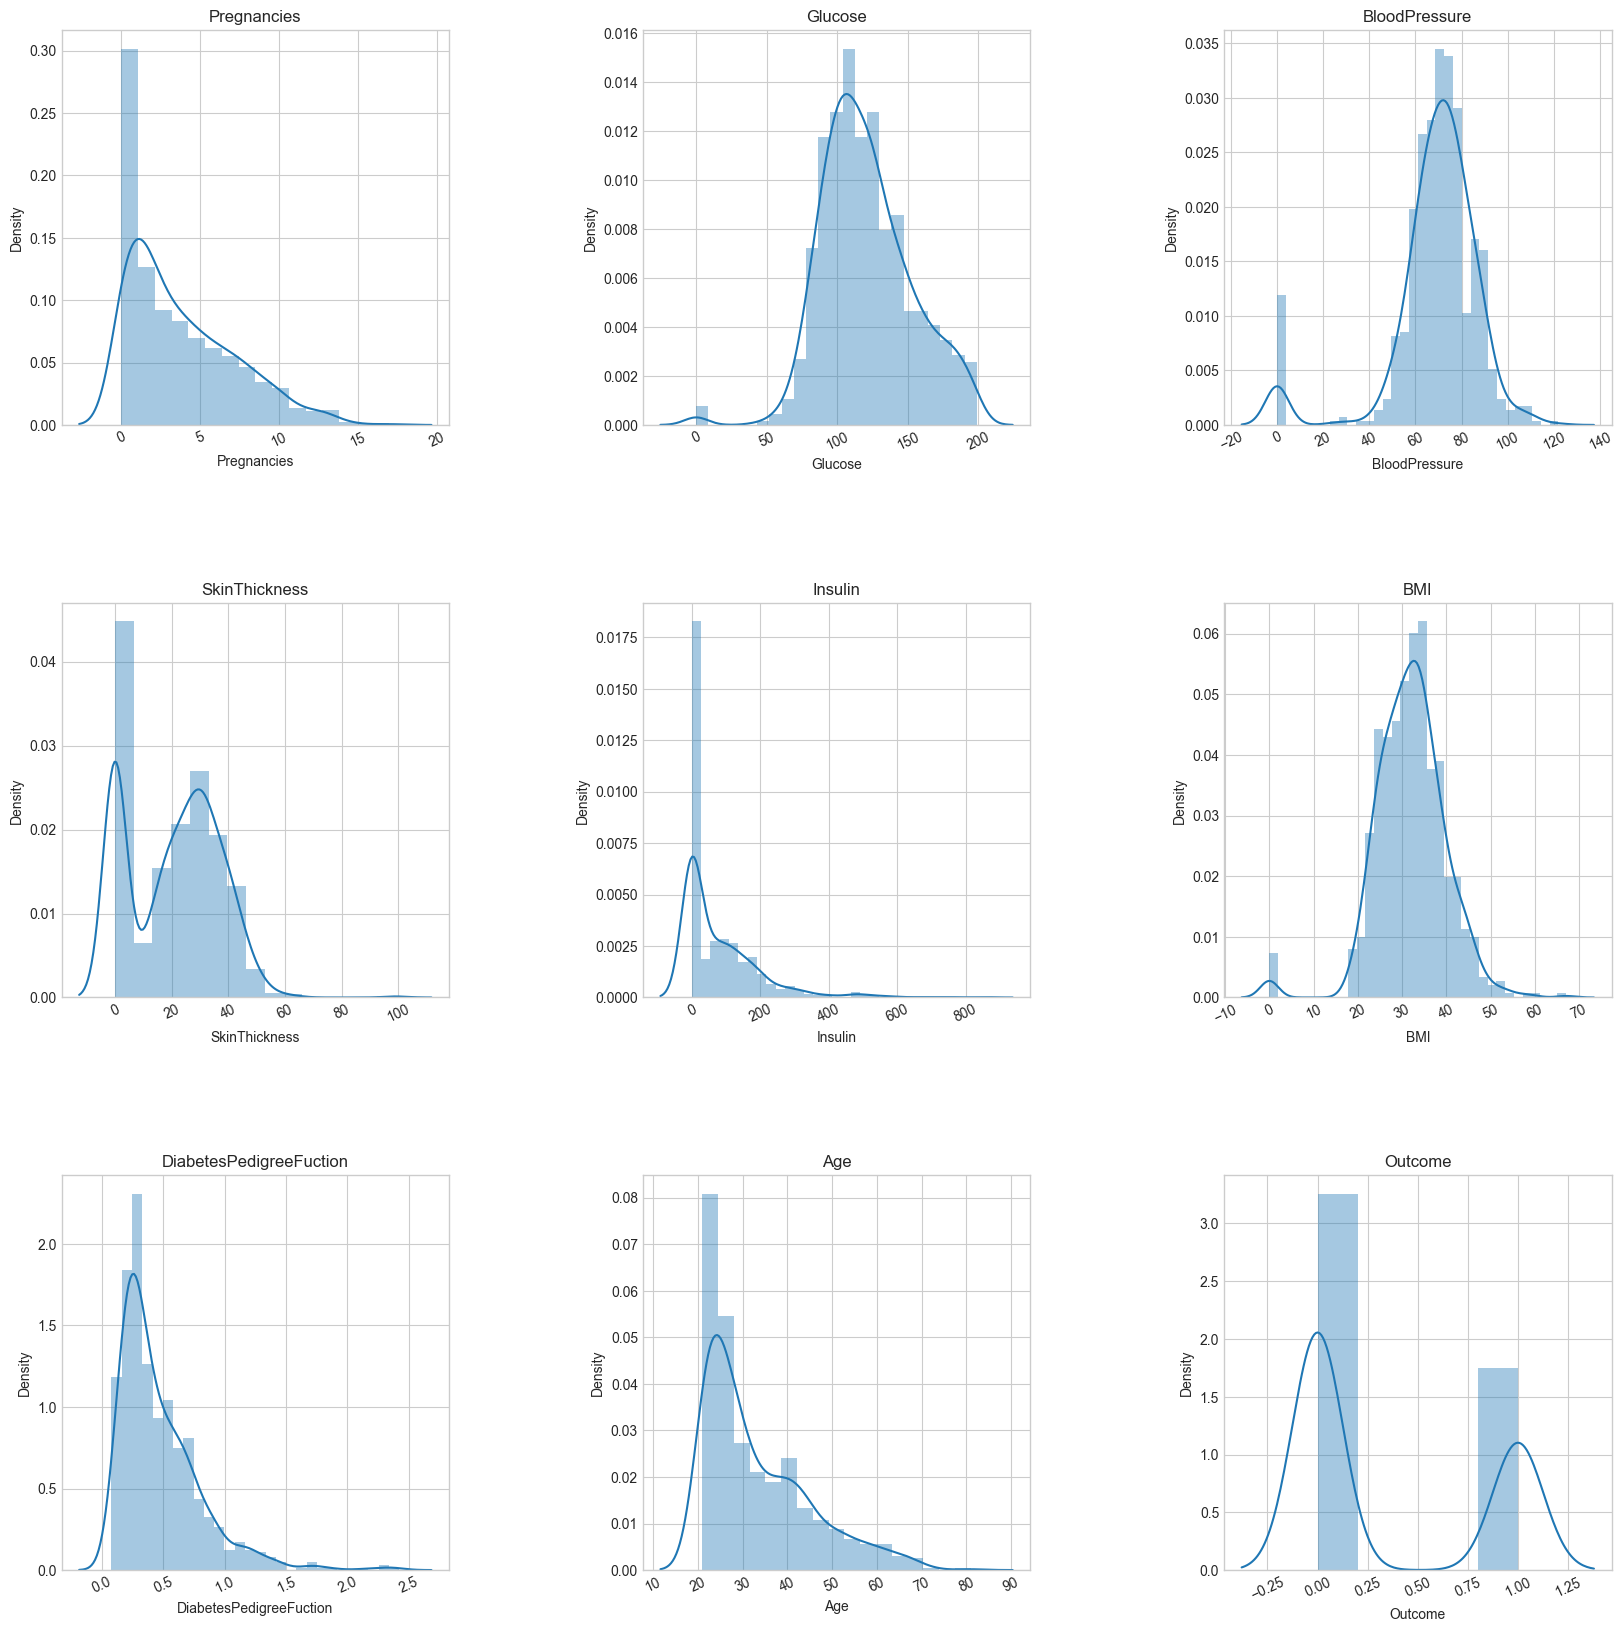

In [145]:
plt.rcParams['font.family'] = 'SimHei'  # 使用宋体，可以根据需要更换为其他中文字体
plot_distribution(df, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)


In [146]:
from sklearn.model_selection import train_test_split
from collections import Counter
x_cols = [col for col in df.columns if col!='Outcome']
y_col = 'Outcome'
X=df[x_cols].values    #dataframe 转化为 ndarray,才能进入下面的标准化和3D制图
y=df[y_col].values


##### Axes3D 绘图函数
是mpl_toolkits.mplot3d中的一个绘图函数，mpl_toolkits.mplot3d

p3d.Axes3D.scatter( xs, ys, zs=0, zdir=’z’, s=20, c=None, depthshade=True, *args, **kwargs )

p3d.Axes3D.scatter3D( xs, ys, zs=0, zdir=’z’, s=20, c=None, depthshade=True, *args, **kwargs)

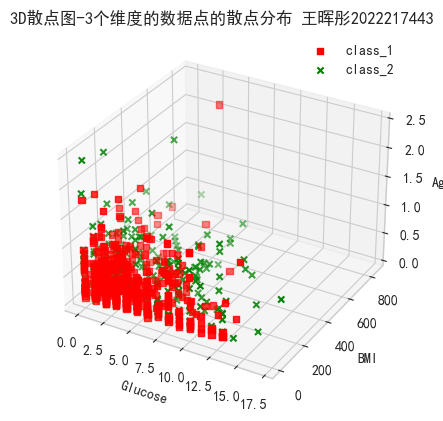

In [147]:
### 绘制3D散点图-3个维度的数据点的散点分布
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['font.family'] = 'SimHei'  # 使用宋体，可以根据需要更换为其他中文字体

ax = Axes3D(plt.figure())

ax = plt.axes(projection="3d") #代码添加

for c,m,i,l in zip('rg','sx',np.unique(y),['class_1','class_2']):
    ax.scatter(X[y==i ,0], X[y==i, 4], X[y==i, 6],c=c,marker=m, label=l)
ax.set_xlabel(df.columns[1])
ax.set_ylabel(df.columns[5])
ax.set_zlabel(df.columns[7])

ax.set_title("3D散点图-3个维度的数据点的散点分布 王晖彤2022217443")
plt.legend()

plt.show()


In [148]:
### 对输入特征进行降维处理
from sklearn.decomposition import PCA
from sklearn import preprocessing                    #调用标准化模块
X_std = preprocessing.scale(X)                        #降维训练前需要对数据标准化
pca = PCA(n_components=0.95, random_state=42)       # 保留99%信息的主成分个主成分
X_pca =pca.fit(X_std).transform(X_std)



In [149]:
print('the Top 95% variance_ratio:',pca.explained_variance_ratio_)

the Top 95% variance_ratio: [0.26185321 0.21640525 0.12862254 0.10946977 0.09528539 0.08533321
 0.05247248 0.05055815]


In [150]:
X_pca.shape

(768, 8)

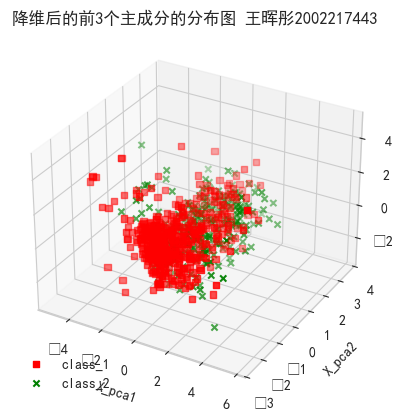

In [151]:
### 输出降维后的前3个主成分的分布图
ax = Axes3D(plt.figure())
ax = plt.axes(projection="3d") #代码添加
for  c, m ,i,l in zip('rg','sx',np.unique(y),['class_1','class_2']):
    ax.scatter(X_pca[y==i, 0], X_pca[y==i,1],X_pca[y==i,2], c=c, label=l, marker=m) # 散点图
ax.set_xlabel('X_pca1')
ax.set_ylabel('X_pca2')
ax.set_zlabel('X_pca3')
ax.set_title("降维后的前3个主成分的分布图 王晖彤2002217443")
plt.legend(loc='lower left')

plt.show()


## 改进算法：KNN算法

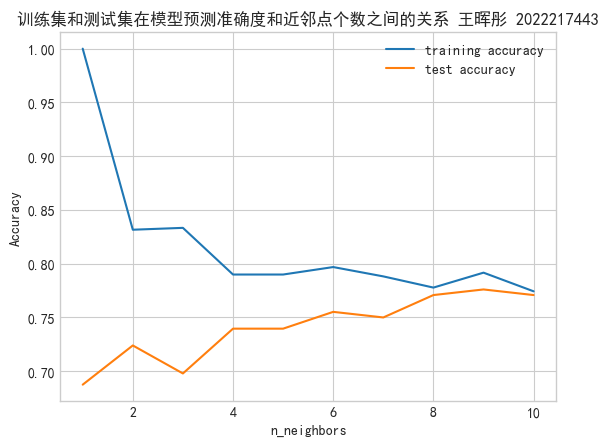

In [152]:
# KNN算法
from sklearn.model_selection import train_test_split
 
X_train,X_test,y_train,y_test=train_test_split(\
    df.loc[:,df.columns !='Outcome'],\
    df['Outcome'],stratify=df['Outcome'],random_state=66)
 
# 把数据切分为特征X和标签y
# 切分数据集，test_size=0.3表示30%为测试集。
# stratify=y表示切分后训练集和测试集中的数据类型的比例跟切分前y中的比例一致
# 如切分前y中0和1的比例为1:2，切分后y_train和y_test中0和1的比例也都是1:2
#X = diabetes_data.drop("Outcome",axis = 1)
#y = diabetes_data.Outcome
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, stratify=y)
 
from sklearn.neighbors import KNeighborsClassifier
# 保存不同k值测试集准确率
training_accuracy = []
# 保存不同k值训练集准确率
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1,11)
 
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train,y_train)
    #record training set accuracy 保存训练集准确率
    training_accuracy.append(knn.score(X_train,y_train))
    #record test set accuracy  保存测试集准确率
    test_accuracy.append(knn.score(X_test,y_test))
plt.figure()
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.title("训练集和测试集在模型预测准确度和近邻点个数之间的关系 王晖彤 2022217443")
plt.legend()  # 给图像加上图例
plt.savefig('knn_compare_model')
 


通过一个循环寻找最佳的K值，不同的K值得到不同的准确率结果。下图展示了训练集和测试集在模型预测准确度和近邻点个数之间的关系，从图中可以看出，如果选择一个近邻点，训练集的预测是绝对正确的，随着近邻点的增加，训练集的准确度下降，而测试集准确度上升，最终选择K=9。

Accuracy of K-NN classifier on training set:0.79
Accuracy of K-NN classifier on training set:0.78
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       128
           1       0.66      0.69      0.67        64

    accuracy                           0.78       192
   macro avg       0.75      0.75      0.75       192
weighted avg       0.78      0.78      0.78       192



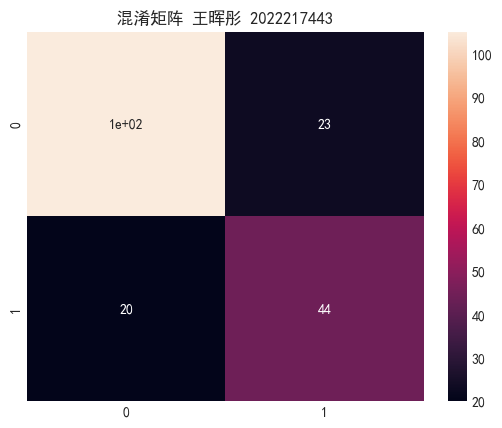

In [153]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
 
print('Accuracy of K-NN classifier on training set:{:.2f}'.format(\
    knn.score(X_train,y_train)))
print('Accuracy of K-NN classifier on training set:{:.2f}'.format(\
    knn.score(X_test,y_test)))
 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)
print(classification_report(y_pred, y_test))
 
confusion = confusion_matrix(y_pred, y_test)
df_cm = pd.DataFrame(confusion)
plt.figure()
sns.heatmap(df_cm, annot=True)
plt.savefig('confusion_matrix')
plt.title("混淆矩阵 王晖彤 2022217443")
plt.show()


confusion_matrix()混淆矩阵，是模型评估的方法之一，在机器学习中总结分类模型预测结果的情形分析表，以矩阵形式将数据集中的记录按照真实的类别与分类模型预测的类别判断两个标准进行汇总。混淆矩阵可以看出，测试集中非糖尿病被预测为非糖尿病有100例，糖尿病被预测为糖尿病有44例，非糖尿病被预测为糖尿病有23例，糖尿病被预测为非糖尿病有20例。

#### 划分训练集与测试集

In [154]:
from collections import Counter
from sklearn.model_selection import train_test_split
### 选择不过滤和降维的全部数据进行训练
X_train, X_test, y_train, y_test = train_test_split(
                    df[x_cols],
                    df[y_col],
                    test_size=0.1,                #分割比例
                    random_state=42,              #随机数种子
                    shuffle=True,                 #是否打乱顺序 
                   stratify=df[y_col]                #指定以Target的比例做分层抽样
)               
print('Distribution of y_train {}'.format(Counter(y_train)))
print('Distribution of y_test {}'.format(Counter(y_test)))

Distribution of y_train Counter({0: 450, 1: 241})
Distribution of y_test Counter({0: 50, 1: 27})


In [155]:
#引入逻辑斯谛回归和交叉验证的库
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#引入评价指标的库
from sklearn.metrics import f1_score

#### 交叉验证评估原始模型
    1：交叉验证用于评估模型的预测性能，尤其是训练好的模型在新数据上的表现，可以在一定程度上减小过拟合。
    2：还可以从有限的数据中获取尽可能多的有效信息。
sklearn.cross_validation.cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None,pre_dispatch=‘2*n_jobs’)
    estimator:估计方法对象(分类器)
    X：数据特征(Features)
    y：数据标签(Labels)
    soring：调用方法(包括accuracy和mean_squared_error等等)
    cv：几折交叉验证
    n_jobs：同时工作的cpu个数（-1代表全部）
返回值是：每次运行交叉验证的估计值数组。


In [156]:
#声明逻辑斯谛回归模型，solver使用liblinear，最大迭代次数为500
lr_model = LogisticRegression()
#对原始模型做交叉验证
cv_score = cross_val_score(lr_model, X_train, y_train, scoring='f1', cv=5) 
print('cross validation score of raw model {}'.format(cv_score))

cross validation score of raw model [0.52380952 0.64367816 0.67391304 0.68181818 0.56097561]


In [157]:
#查看下当前模型
lr_model 

LogisticRegression()

 ##### GridSearchCV()
   网格搜索（GridSearch）用于选取模型的最优超参数。获取最优超参数的方式可以绘制验证曲线，但是验证曲线只能每次获取一个最优超参数。如果多个超参数有很多排列组合的话，就可以使用网格搜索寻求最优超参数的组合。 
    estimator:选择使用的分类器，并且传入除需要确定最佳的参数之外的其他参数。
    param_grid:需要最优化的参数的取值，值为字典或者列表，键命名必须为模型本身的参数名称
    scoring：模型评价标准，默认None(即选择的estimator的误差估计函数)。常为'f1','accuracy','recall','roc_auc',‘average_precision’
    cv=None,交叉验证参数，默认3

In [158]:
c_range=[0.001,0.01,0.1,1.0]
solvers = ['liblinear','lbfgs','newton-cg','sag']
max_iters=[80,100,150,200,300]
tuned_parameters= dict(solver=solvers, C=c_range,max_iter=max_iters)

In [159]:
#网格搜素
from sklearn.model_selection import GridSearchCV
grid= GridSearchCV(lr_model, tuned_parameters, cv=5, scoring='f1')
grid.fit(X_train,y_train)
print('best score for model {}'.format(grid.best_score_))
print('best parameters for model {}'.format(grid.best_params_))
print('best parameters for model {}'.format(grid.best_estimator_))


best score for model 0.6244254799841867
best parameters for model {'C': 1.0, 'max_iter': 80, 'solver': 'newton-cg'}
best parameters for model LogisticRegression(max_iter=80, solver='newton-cg')


In [160]:
#### 根据选择后的参数，最后预测
lr_model_final = LogisticRegression(C=1.0, max_iter=80, solver='newton-cg')
lr_model_final.fit(X_train,y_train)
y_train_pred = lr_model_final.predict(X_train)
print('final score of model version2: {}'.format(f1_score(y_train,y_train_pred)))

final score of model version2: 0.6448598130841121
